In [3]:
import pandas as pd
import numpy as np
import quandl
import math
import matplotlib.pyplot as plt
from sklearn import cross_validation,svm,preprocessing
from sklearn.linear_model import LinearRegression
import datetime
from matplotlib import style
import pickle
style.use('ggplot')
%matplotlib notebook

In [19]:
df=quandl.get('WIKI/GOOGL')

In [20]:
df=df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]
df['HL_PCT']= (df['Adj. High']-df['Adj. Close'])/df['Adj. Close']*100.0
df['PCT_change']= (df['Adj. Close']-df['Adj. Open'])/df['Adj. Open']*100.0

In [8]:

df=df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]

In [9]:
forecast_col='Adj. Close'
df.fillna(-99999,inplace=True)

In [10]:
forecast_out=int(math.ceil(0.1*len(df)))
df['label']=df[forecast_col].shift(-forecast_out)

In [11]:
X=np.array(df.drop(['label'],1))
X=preprocessing.scale(X)
X_lately=X[-forecast_out:]
X=X[:-forecast_out]
df.dropna(inplace=True)
y=np.array(df['label'])

In [12]:
X_train,X_test,y_train,y_test=cross_validation.train_test_split(X,y,test_size=0.2)


In [13]:
clf=LinearRegression(n_jobs=-1)
#clf=svm.SVR(kernel='poly')
clf.fit(X_train,y_train)

#saving a classifier - pickling
with open('linearregression.pickle','wb') as f:
    pickle.dump(clf,f)
pickle_in=open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)

In [14]:
accuracy=clf.score(X_test,y_test)

forecast_set=clf.predict(X_lately)
print(forecast_set,accuracy,forecast_out)

[ 964.36918224  949.5135982   980.51784409  975.79417565  987.00949332
  980.17529212  986.31856165  988.05946145  978.04325739  975.49363983
 1004.48843055  994.91851803  978.51796428  961.06300141  963.89372478
  979.4404772   977.35036205  996.42697024  998.44712874 1017.5526129
 1014.3193373  1030.45250148 1029.60585817 1025.36288893 1015.04981738
 1020.79128328 1019.74897316 1014.76982758 1012.18294933 1011.97957571
 1019.53002704 1008.66580991 1005.81581999  994.56386962 1017.53476713
 1013.22794083 1019.0887747  1041.30942704 1036.33698208 1033.84663334
 1037.30366011 1036.3599728  1041.04853427 1033.41074754 1034.45801539
 1036.22672753 1033.43081756 1063.09859965 1063.43917289 1074.13325747
 1070.36266798 1070.10214367 1033.45290671 1026.56831184 1020.99325396
 1031.05824301 1028.2965118  1026.08149735 1040.13524078 1040.15743261
 1036.44205849 1045.39831283 1050.73775564 1050.19819508 1048.80335195
 1053.8137613  1059.86670736 1063.75979255 1067.27479251 1063.09041333
 1057.9

            Adj. Close    HL_PCT  PCT_change  Adj. Volume       label  \
Date                                                                    
2004-08-19   50.322842  3.712563    0.324968   44659000.0  214.005615   
2004-08-20   54.322689  0.710922    7.227007   22834300.0  210.725489   
2004-08-23   54.869377  3.729433   -1.227880   18256100.0  208.072299   
2004-08-24   52.597363  6.417469   -5.726357   15247300.0  218.288837   
2004-08-25   53.164113  1.886792    1.183658    9188600.0  223.309335   

            Forecast  
Date                  
2004-08-19       NaN  
2004-08-20       NaN  
2004-08-23       NaN  
2004-08-24       NaN  
2004-08-25       NaN  


<IPython.core.display.Javascript object>


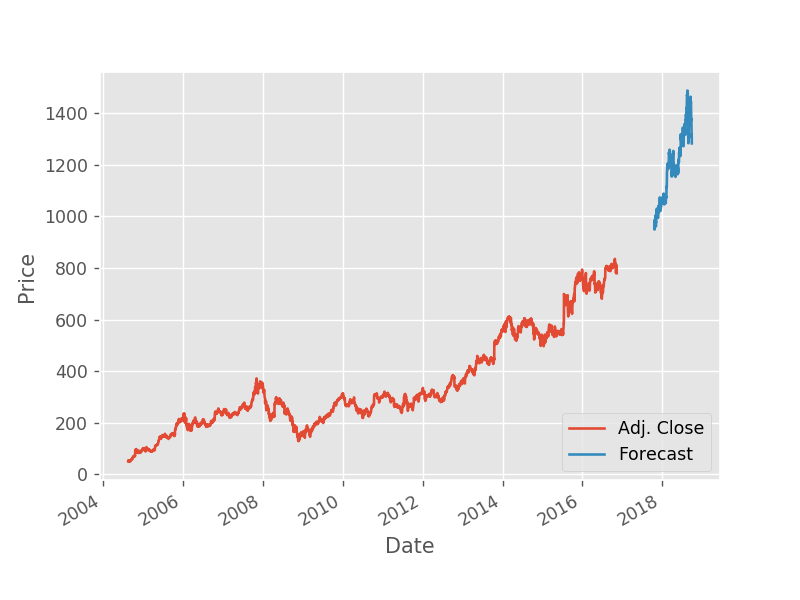

In [16]:
df['Forecast']=np.nan

last_date=df.iloc[-1].name
last_unix=last_date.timestamp()
one_day=86400
next_unix=last_unix+one_day

for i in forecast_set:
    next_date=datetime.datetime.fromtimestamp(next_unix)
    next_unix+=one_day
    df.loc[next_date]=[np.nan for _ in range(len(df.columns)-1)] +[i]

print(df.head())    
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()